In [22]:
import torch

cir = torch.load("/root/NC_Dataset/2d/dam2d/cir.pth")

In [23]:
cir.shape

torch.Size([40, 31, 2, 128, 128])

In [24]:
# 使用 torch.nan_to_num 将 NaN 值替换为 0
tensor_filled = torch.nan_to_num(cir, nan=0.0)
cir = tensor_filled

In [26]:
torch.save(cir,"cir_mask.pth")

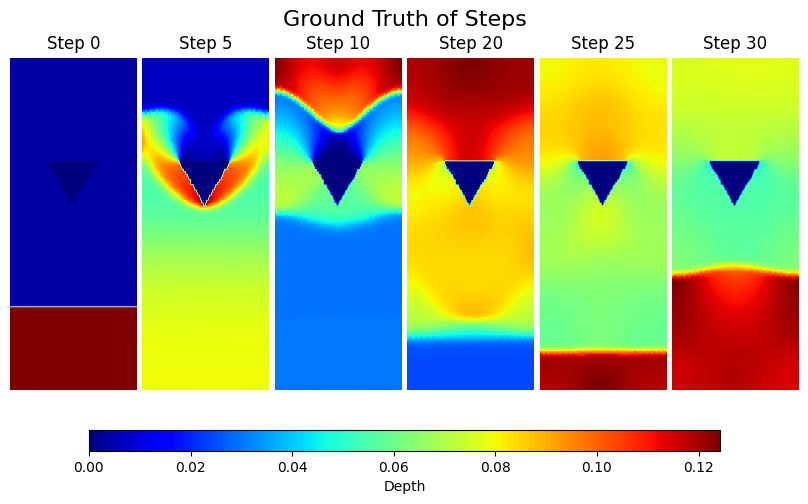

In [20]:
import matplotlib.pyplot as plt

# 假设cir是你的四维数组，维度可能是 [num_cases, num_steps, channels, height, width]
# 这里我们选择的是第15个case，第2个channel（Python索引从0开始）

steps = [0, 5, 10,20,25, 30]  # 因为Python的索引从0开始，所以实际上是第1步，第10步，第20步，第30步
fig, axes = plt.subplots(1, len(steps), figsize=(8, 6))  # 创建一个1行多列的图形，每列放一个步骤的图像
fig.suptitle('Ground Truth of Steps',  fontsize=16, y=0.85)
# 在子图中显示每个步骤的图像
for ax, step in zip(axes, steps):
    im = ax.imshow(cir[-1, step, 0, :, :], extent=(0, 0.61, 0, 1.6), origin='lower', cmap='jet')
    ax.axis('off')  # 关闭坐标轴显示
    ax.set_title(f"Step {step}")  # 添加标题，显示每个子图对应的时间步，因为步数从0开始，显示时加

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.01, hspace=0)
plt.tight_layout(pad=0.4)
# 在最后一个子图旁边添加颜色条
# 添加颜色条，设置aspect和shrink调整颜色条的大小和形状
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), orientation='horizontal', pad=0.07, aspect=30, shrink=0.8)
cbar.set_label('Depth')


# 保存图像，包含紧凑边框调整
plt.savefig("ground truth.png", dpi=300, bbox_inches='tight')
